In [6]:
 # Assignment_no_2.
 # Implementing Feedforward neural networks with Keras and TensorFlow
 #  a. Import the necessary packages
 #   b. Load the training and testing data (MNIST/CIFAR10)
 #   c. Define the network architecture using Keras
 #   d. Train the model using SGD
 #   e. Evaluate the network
 #   f. Plot the training loss and accuracy


In [1]:
# Import necessary libraries
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist  # Import the mnist dataset
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
# Grab the MNIST dataset
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [3]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [4]:
#building the model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

C:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
sgd = SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1357 - loss: 2.3192 - val_accuracy: 0.2949 - val_loss: 2.2504
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2839 - loss: 2.2377 - val_accuracy: 0.4697 - val_loss: 2.1923
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4839 - loss: 2.1781 - val_accuracy: 0.5236 - val_loss: 2.1142
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5297 - loss: 2.0940 - val_accuracy: 0.5866 - val_loss: 2.0040
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5785 - loss: 1.9759 - val_accuracy: 0.6420 - val_loss: 1.8538
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6229 - loss: 1.8197 - val_accuracy: 0.6497 - val_loss: 1.6709
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6512 - loss: 1.6380 - val_accuracy: 0.6879 - val_loss: 1.4774
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6918 - loss: 1.4504 - val_accuracy: 0.

In [6]:
#making the predictions
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       980
           1       0.78      0.99      0.87      1135
           2       0.86      0.73      0.79      1032
           3       0.73      0.86      0.79      1010
           4       0.76      0.68      0.72       982
           5       0.87      0.49      0.62       892
           6       0.83      0.90      0.86       958
           7       0.78      0.88      0.83      1028
           8       0.84      0.62      0.71       974
           9       0.67      0.70      0.68      1009

    accuracy                           0.79     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.79      0.78     10000



Text(0, 0.5, 'Loss/Accuracy')

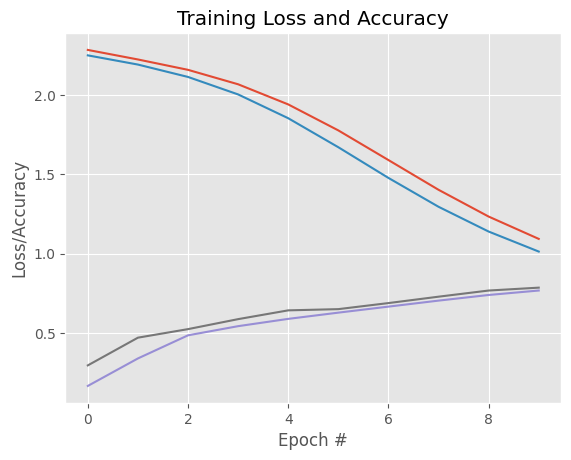

In [7]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")